# Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

**Data Dictionary**

Train file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

| Variable           | Description                                    |
|--------------------|------------------------------------------------|
| Loan_ID            | 	Unique Loan ID                                |
| Gender	            | Male/ Female                                   |
| Married	           | Applicant married (Y/N)                        |
| Dependents	        | Number of dependents                           |
| Education	         | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed      | 	Self employed (Y/N)                           |
| ApplicantIncome    | 	Applicant income                              |
| CoapplicantIncome	 | Coapplicant income                             |
| LoanAmount	        | Loan amount in thousands                       |
| Loan_Amount_Term	  | Term of loan in months                         |
| Credit_History	    | credit history meets guidelines                |
| Property_Area	     | Urban/ Semi Urban/ Rural                       |
| Loan_Status	       | (Target) Loan approved (Y/N)                   |


Test file: CSV containing the customer information for whom loan eligibility is to be predicted

| Variable           | Description                                    |
|--------------------|------------------------------------------------|
| Loan_ID            | 	Unique Loan ID                                |
| Gender	            | Male/ Female                                   |
| Married	           | Applicant married (Y/N)                        |
| Dependents	        | Number of dependents                           |
| Education	         | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed      | 	Self employed (Y/N)                           |
| ApplicantIncome    | 	Applicant income                              |
| CoapplicantIncome	 | Coapplicant income                             |
| LoanAmount	        | Loan amount in thousands                       |
| Loan_Amount_Term	  | Term of loan in months                         |
| Credit_History	    | credit history meets guidelines                |
| Property_Area	     | Urban/ Semi Urban/ Rural                       |

Submission file format:

| Variable	    | Description                  |
|--------------|------------------------------|
| Loan_ID	     | Unique Loan ID               |
| Loan_Status	 | (Target) Loan approved (Y/N) |

**Evaluation Metric**

Your model performance will be evaluated on the basis of your prediction of loan status for the test data (test.csv), which contains similar data-points as train except for the loan status to be predicted. Your submission needs to be in the format as shown in sample submission.

We at our end, have the actual loan status for the test dataset, against which your predictions will be evaluated. We will use the Accuracy value to judge your response.

**Public and Private Split**

Test file is further divided into Public (25%) and Private (75%)

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score, which will be published once the competition is over.


**Guidelines for Final Submission**

Please ensure that your final submission includes the following:

1. Solution file containing the predicted sales value in the test dataset (format is given in sample submission csv)
2. Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission


### Load the Workspace

In [71]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.calibration import CalibratedClassifierCV

import tensorflow as tf

### Load the Data

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
sample = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
sample.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


### Data Cleaning and Exploration

Some rows have missing data:

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We'll fill missing values with modes or means:

In [7]:
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            df[col] = df[col].fillna(df[col].mean())
        else: 
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [8]:
train = fill_missing_values(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.000000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.037468,64.372489,0.349681,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,129.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


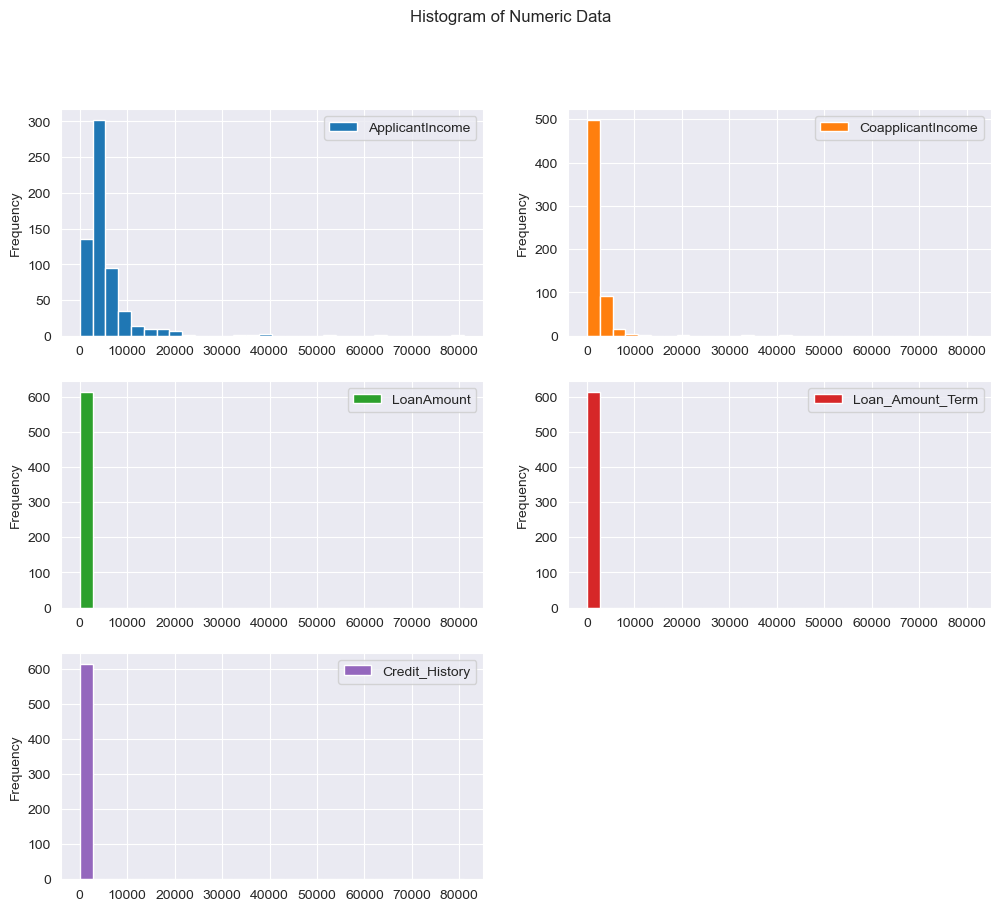

In [10]:
train.select_dtypes('number').plot(
    subplots=True, figsize=(12,10), kind='hist', bins=30,
    layout=(3, 2), sharex=False, sharey=False, 
    title='Histogram of Numeric Data'
)
plt.show()

In [11]:
train.select_dtypes('object').iloc[:, 1:].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


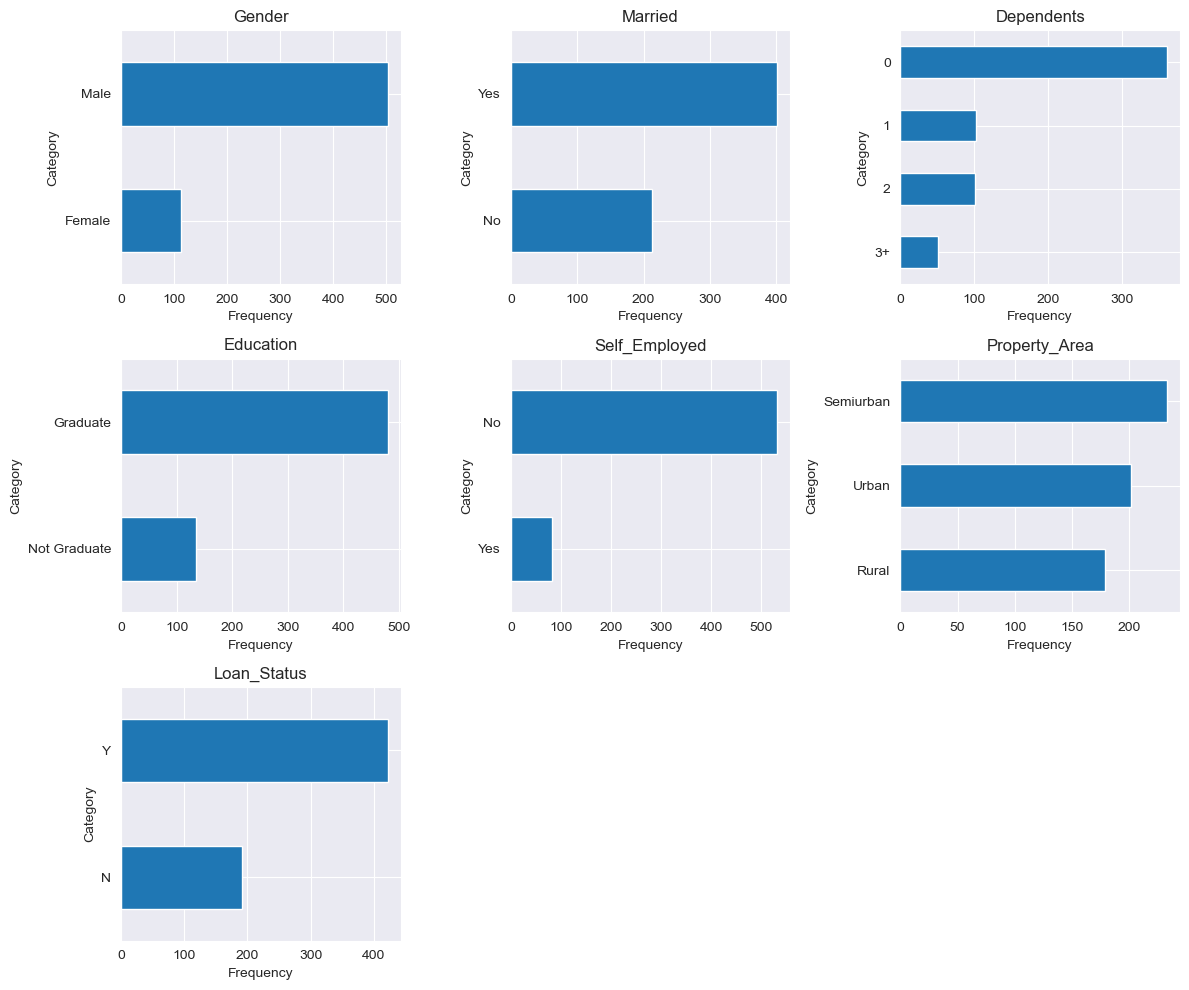

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i, col in enumerate(train.select_dtypes('object').iloc[:, 1:].columns):
    counts = train[col].value_counts()
    counts.plot(kind='barh', ax=axes.ravel()[i])
    axes.ravel()[i].set_title(col)
    axes.ravel()[i].set_ylabel('Category')
    axes.ravel()[i].set_xlabel('Frequency')
    axes.ravel()[i].invert_yaxis()

# Hide any unused subplots
# for j in range(len(non_numeric_cols), num_rows * num_cols):
#     axes[j].axis('off')

for j in range(len(train.select_dtypes('object').iloc[:, 1:].columns), 3 * 3):
    axes.ravel()[j].axis('off')

plt.tight_layout()
plt.show()

Let's visualize the numeric data without Missing Values / Outliers:

In [13]:
train2 = pd.read_csv('train_ctrUa4K.csv')
train2 = train2.dropna(axis=0)
train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


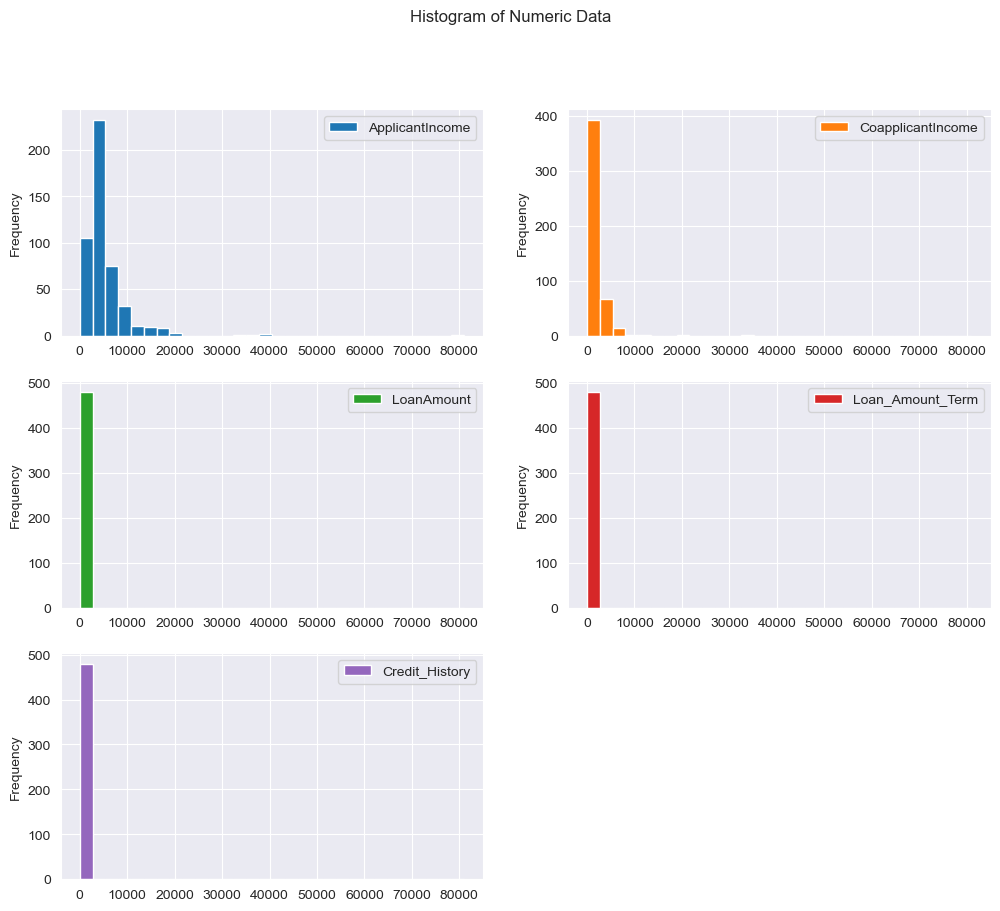

In [14]:
train2.select_dtypes('number').plot(
    subplots=True, figsize=(12,10), kind='hist', bins=30,
    layout=(3, 2), sharex=False, sharey=False,
    title='Histogram of Numeric Data'
)
plt.show()

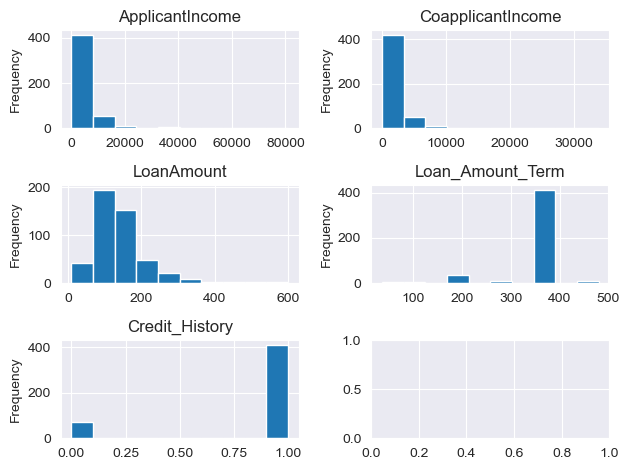

In [15]:
fig, axes = plt.subplots(3, 2)
for i, col in enumerate(train2.select_dtypes('number').columns):
    train2[col].plot.hist(ax=axes.ravel()[i])
    axes.ravel()[i].set_title(col)

plt.tight_layout()
plt.show()

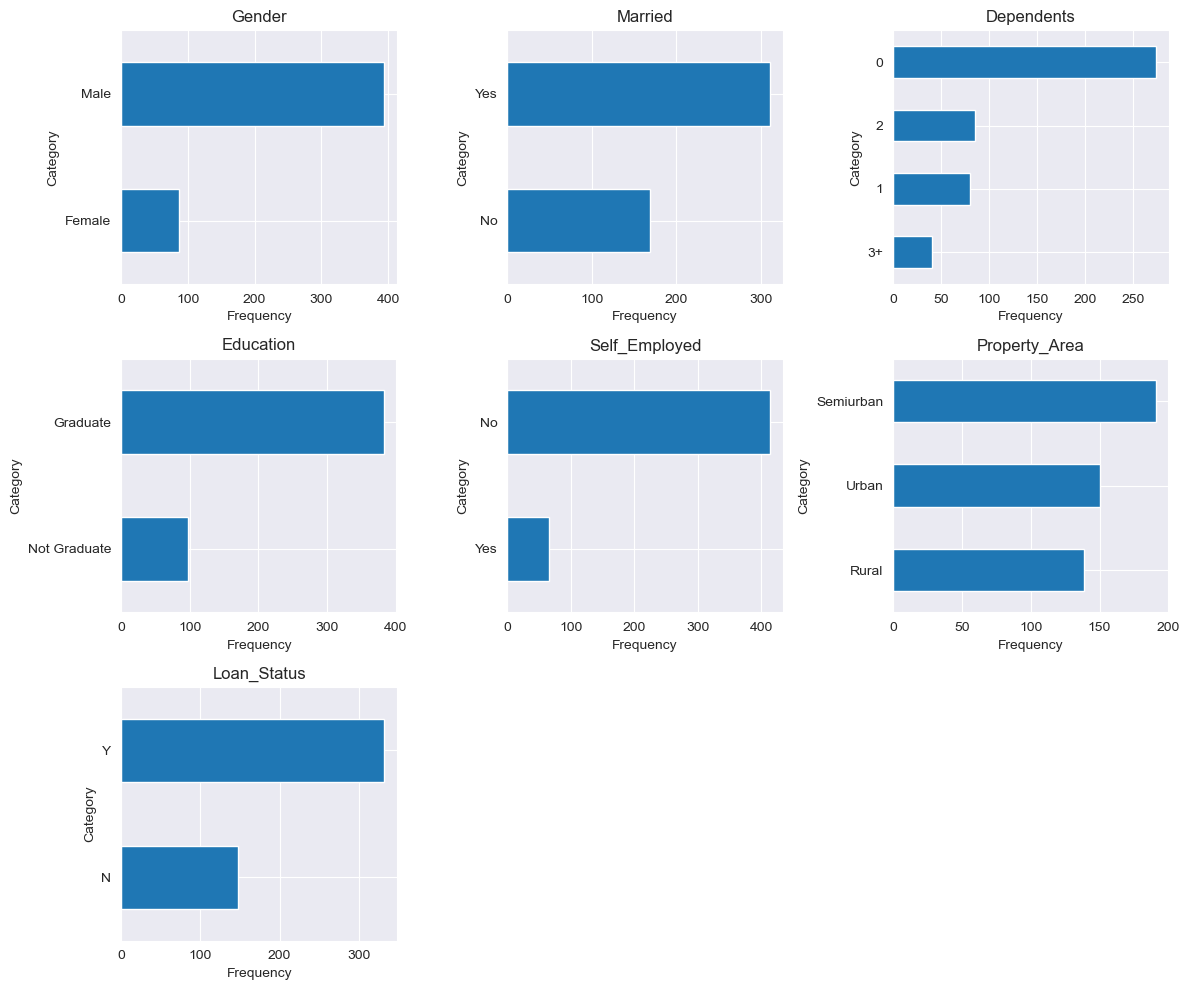

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

for i, col in enumerate(train2.select_dtypes('object').iloc[:, 1:].columns):
    counts = train2[col].value_counts()
    counts.plot(kind='barh', ax=axes.ravel()[i])
    axes.ravel()[i].set_title(col)
    axes.ravel()[i].set_ylabel('Category')
    axes.ravel()[i].set_xlabel('Frequency')
    axes.ravel()[i].invert_yaxis()

# Hide any unused subplots
# for j in range(len(non_numeric_cols), num_rows * num_cols):
#     axes[j].axis('off')

for j in range(len(train2.select_dtypes('object').iloc[:, 1:].columns), 3 * 3):
    axes.ravel()[j].axis('off')

plt.tight_layout()
plt.show()

### Feature Engineering

In [17]:
train = pd.read_csv('train_ctrUa4K.csv')
X, y = train.drop(columns=['Loan_ID', 'Loan_Status']), train.Loan_Status

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.3, random_state=42)


In [18]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural
261,Male,No,0,Graduate,No,2060,2209.0,134.0,360.0,1.0,Semiurban
496,Male,Yes,0,Not Graduate,No,2600,1700.0,107.0,360.0,1.0,Rural
529,Male,No,0,Not Graduate,No,6783,0.0,130.0,360.0,1.0,Semiurban


**Encode Categorical Data**

In [19]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Pipeline for numeric features (Imputation)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Pipeline for categorical features (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline combining preprocessing and modeling
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [20]:
# Fit and transform the data using the pipeline
transformed_data = full_pipeline.fit_transform(X_train)

# Get the column names after transformation from OneHotEncoder
feature_names = (numeric_features +
                 list(full_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

# Create DataFrame from transformed data with column headers
X_train = pd.DataFrame(transformed_data, columns=feature_names)
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,2454.0,2333.0,181.0,360.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,2894.0,2792.0,155.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,2060.0,2209.0,134.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2600.0,1700.0,107.0,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,6783.0,0.0,130.0,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [21]:
# Fit and transform the data using the pipeline
transformed_data = full_pipeline.fit_transform(X_val)

# Get the column names after transformation from OneHotEncoder
feature_names = (numeric_features +
                 list(full_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

# Create DataFrame from transformed data with column headers
X_val = pd.DataFrame(transformed_data, columns=feature_names)
X_val.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,9083.0,0.0,228.0,360.0,1.000000,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,4310.0,0.0,130.0,360.0,0.826347,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,4167.0,1447.0,158.0,360.0,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2900.0,0.0,71.0,360.0,1.000000,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2718.0,0.0,70.0,360.0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


**Correlation Matrix**

In [22]:
label_encoder = LabelEncoder()
y_train_encoded = pd.DataFrame({'Loan_Status':label_encoder.fit_transform(y_train)})
y_val_encoded = pd.DataFrame({'Loan_Status':label_encoder.transform(y_val)})

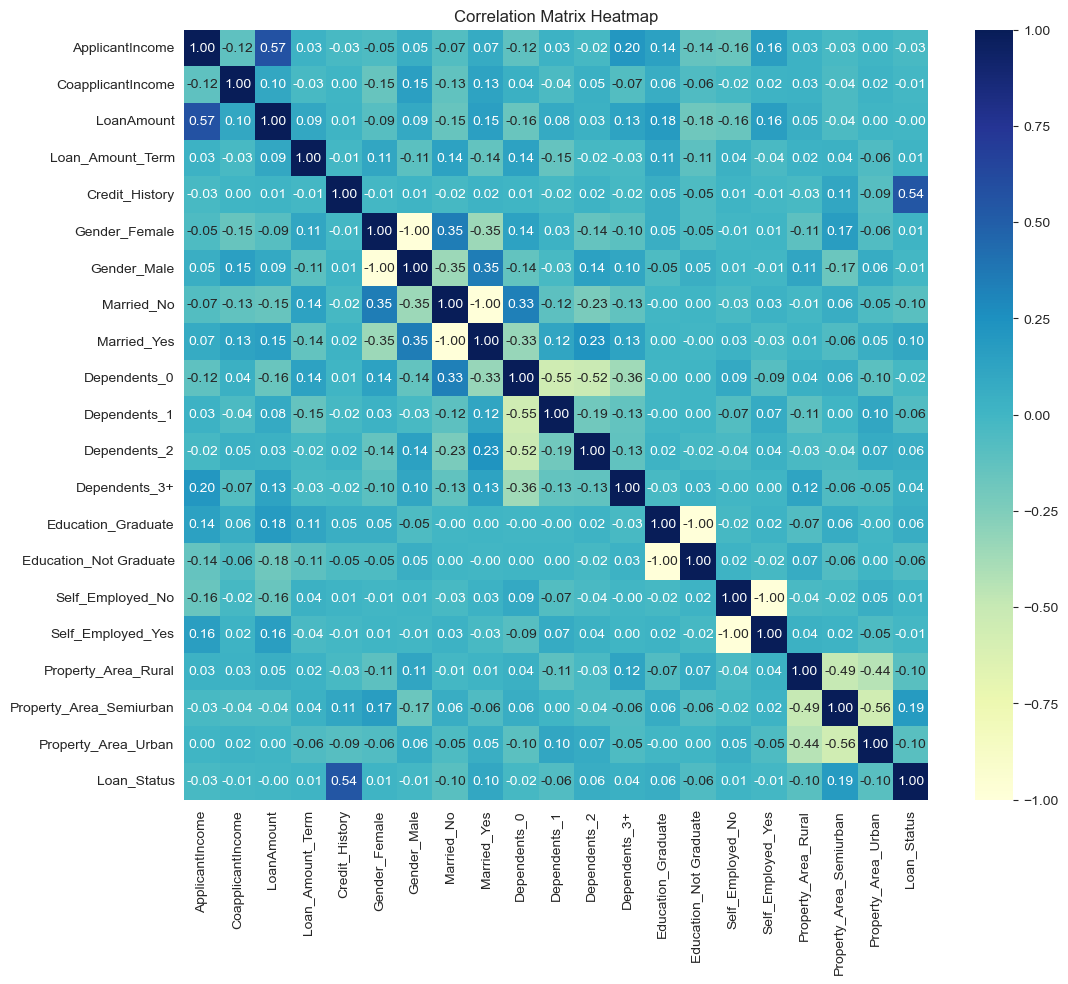

In [23]:
correlation_matrix = pd.concat([X_train, y_train_encoded], axis=1).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

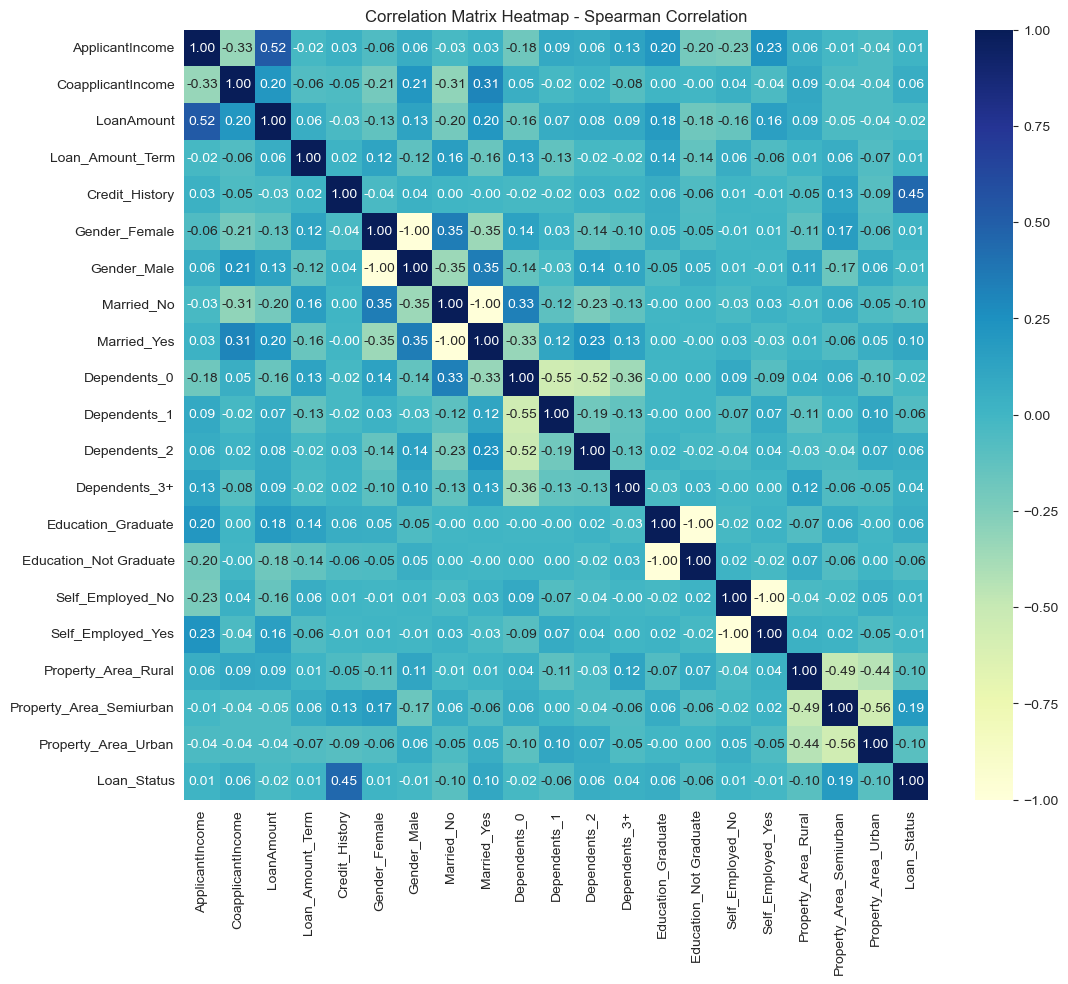

In [24]:
correlation_matrix = pd.concat([X_train, y_train_encoded], axis=1).corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix Heatmap - Spearman Correlation')
plt.show()

Models:

In [25]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

In [26]:
lr = LogisticRegression(max_iter=2000, class_weight=class_weight_dict)
sgd_clf = SGDClassifier(max_iter=2000, class_weight=class_weight_dict)
linear_svc = LinearSVC(max_iter=2000, class_weight=class_weight_dict, dual='auto')
svc = SVC(max_iter=2000, class_weight=class_weight_dict)
tree_clf = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, class_weight=class_weight_dict)
rf_clf = RandomForestClassifier(max_depth=4, min_samples_leaf=5, class_weight=class_weight_dict)
et_clf = ExtraTreesClassifier(max_depth=4, min_samples_leaf=5, class_weight=class_weight_dict)
gb_clf = GradientBoostingClassifier(max_depth=4, min_samples_leaf=5)
knn_clf = KNeighborsClassifier(n_neighbors=5)
xgb_clf = XGBClassifier()

In [27]:
def simple_classifier_cross_val(
        model, X_train, y_train
):
    ## Helper function to train a classifier with cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    formatted_scores = [f'{score:.2f}' for score in scores]
    formatted_mean_score = f'{scores.mean():.2f}'

    print("Accuracy scores for each fold:", formatted_scores)
    print("Mean Accuracy score:", formatted_mean_score)

In [28]:
model_names = ['LogisticRegression', 'SGDClassifier', 'LinearSVC', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']

models = [lr, sgd_clf, linear_svc, svc, tree_clf, rf_clf, et_clf, gb_clf, knn_clf, xgb_clf]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for model, model_name in zip(models, model_names):
        print(model_name)
        try:
            simple_classifier_cross_val(
                model, X_train, y_train
            )
        except ValueError as e:
            simple_classifier_cross_val(
                model, X_train, y_train_encoded
            )
        print('\n')

LogisticRegression
Accuracy scores for each fold: ['0.73', '0.69', '0.67', '0.81', '0.69']
Mean Accuracy score: 0.72


SGDClassifier
Accuracy scores for each fold: ['0.70', '0.63', '0.51', '0.53', '0.49']
Mean Accuracy score: 0.57


LinearSVC
Accuracy scores for each fold: ['0.80', '0.71', '0.67', '0.83', '0.69']
Mean Accuracy score: 0.74


SVC
Accuracy scores for each fold: ['0.45', '0.49', '0.47', '0.43', '0.41']
Mean Accuracy score: 0.45


DecisionTreeClassifier
Accuracy scores for each fold: ['0.76', '0.71', '0.67', '0.76', '0.61']
Mean Accuracy score: 0.70


RandomForestClassifier
Accuracy scores for each fold: ['0.83', '0.78', '0.78', '0.80', '0.76']
Mean Accuracy score: 0.79


ExtraTreesClassifier
Accuracy scores for each fold: ['0.77', '0.76', '0.69', '0.80', '0.72']
Mean Accuracy score: 0.75


GradientBoostingClassifier
Accuracy scores for each fold: ['0.79', '0.79', '0.76', '0.80', '0.76']
Mean Accuracy score: 0.78


KNeighborsClassifier
Accuracy scores for each fold: ['0.63'

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [30]:
simple_classifier_cross_val(lr, X_train_scaled, y_train)

Accuracy scores for each fold: ['0.79', '0.70', '0.67', '0.81', '0.66']
Mean Accuracy score: 0.73


In [31]:
simple_classifier_cross_val(sgd_clf, X_train_scaled, y_train)

Accuracy scores for each fold: ['0.65', '0.77', '0.57', '0.76', '0.55']
Mean Accuracy score: 0.66


In [32]:
simple_classifier_cross_val(linear_svc, X_train_scaled, y_train)

Accuracy scores for each fold: ['0.80', '0.71', '0.67', '0.83', '0.69']
Mean Accuracy score: 0.74


In [33]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[20,]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(100, activation="relu",
                                    kernel_initializer="he_normal"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,
                                                 beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train_encoded, epochs=5,
                    validation_data=(X_val_scaled, y_val_encoded))

Epoch 1/5


2024-01-03 09:21:58.380662: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


14/14 [==============================] - 16s 84ms/step - loss: 1.2359 - accuracy: 0.5455 - val_loss: 0.6707 - val_accuracy: 0.6486
Epoch 2/5
14/14 [==============================] - 0s 18ms/step - loss: 0.6822 - accuracy: 0.7040 - val_loss: 0.7296 - val_accuracy: 0.6486
Epoch 3/5
14/14 [==============================] - 0s 18ms/step - loss: 0.6316 - accuracy: 0.7040 - val_loss: 0.7807 - val_accuracy: 0.6486
Epoch 4/5
14/14 [==============================] - 0s 19ms/step - loss: 0.6623 - accuracy: 0.7040 - val_loss: 0.6826 - val_accuracy: 0.6486
Epoch 5/5
14/14 [==============================] - 0s 20ms/step - loss: 0.6310 - accuracy: 0.7040 - val_loss: 0.6695 - val_accuracy: 0.6486


The best model is the Gradient Boosted Trees.

**Hyperparameter Tuning**

In [34]:
gb_clf = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 100}
Best Score: 0.8158139534883722


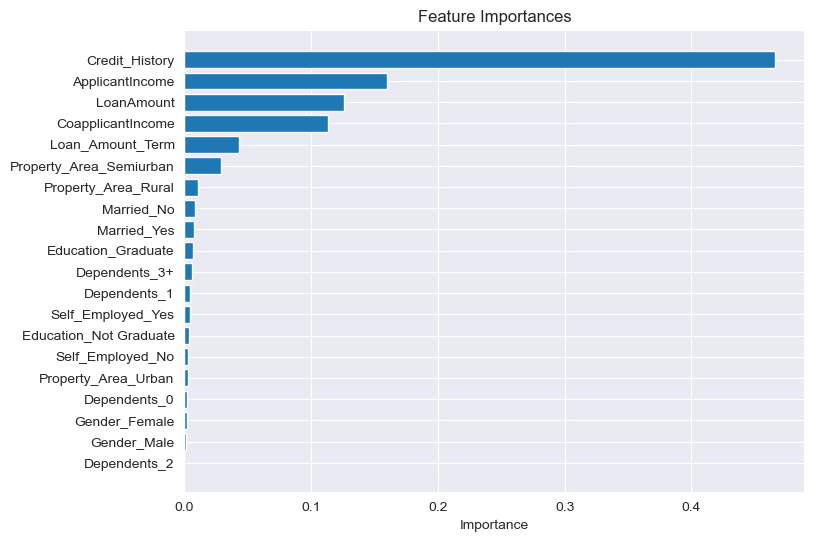

In [35]:
# Find Feature Importances
gb_clf.fit(X_train, y_train)
feature_importance = gb_clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(
    feature_importance_df['Feature'], feature_importance_df['Importance']
)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [36]:
feature_importance_df

,Feature,Importance
4,Credit_History,4.658695e-01
0,ApplicantIncome,1.596888e-01
2,LoanAmount,1.261775e-01
1,CoapplicantIncome,1.134259e-01
3,Loan_Amount_Term,4.277888e-02
18,Property_Area_Semiurban,2.888803e-02
17,Property_Area_Rural,1.066468e-02
7,Married_No,8.138988e-03
8,Married_Yes,7.847212e-03
13,Education_Graduate,6.704284e-03


In [37]:
low_imp_features = feature_importance_df.loc[feature_importance_df['Importance'] < 0.01, 'Feature'].tolist()

X_train['combined_low_features'] = X_train[low_imp_features].sum(axis=1)
X_train = X_train.drop(low_imp_features, axis=1)
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,combined_low_features
0,2454.0,2333.0,181.0,360.0,0.0,0.0,0.0,6.0
1,2894.0,2792.0,155.0,360.0,1.0,1.0,0.0,5.0
2,2060.0,2209.0,134.0,360.0,1.0,0.0,1.0,5.0
3,2600.0,1700.0,107.0,360.0,1.0,1.0,0.0,5.0
4,6783.0,0.0,130.0,360.0,1.0,0.0,1.0,5.0


In [38]:
lr = LogisticRegression()
sgd_clf = SGDClassifier()
linear_svc = LinearSVC(dual='auto')
svc = SVC()
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
et_clf = ExtraTreesClassifier()
gb_clf = GradientBoostingClassifier()
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier()

model_names = ['LogisticRegression', 'SGDClassifier', 'LinearSVC', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']

models = [lr, sgd_clf, linear_svc, svc, tree_clf, rf_clf, et_clf, gb_clf, knn_clf, xgb_clf]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for model, model_name in zip(models, model_names):
        print(model_name)
        try:
            simple_classifier_cross_val(
                model, X_train, y_train
            )
        except ValueError as e:
            simple_classifier_cross_val(
                model, X_train, y_train_encoded
            )
        print('\n')

LogisticRegression
Accuracy scores for each fold: ['0.84', '0.81', '0.83', '0.81', '0.80']
Mean Accuracy score: 0.82


SGDClassifier
Accuracy scores for each fold: ['0.60', '0.30', '0.55', '0.28', '0.69']
Mean Accuracy score: 0.49


LinearSVC
Accuracy scores for each fold: ['0.84', '0.83', '0.83', '0.81', '0.80']
Mean Accuracy score: 0.82


SVC
Accuracy scores for each fold: ['0.70', '0.70', '0.70', '0.71', '0.71']
Mean Accuracy score: 0.70


DecisionTreeClassifier
Accuracy scores for each fold: ['0.73', '0.69', '0.67', '0.72', '0.75']
Mean Accuracy score: 0.71


RandomForestClassifier
Accuracy scores for each fold: ['0.80', '0.78', '0.81', '0.77', '0.85']
Mean Accuracy score: 0.80


ExtraTreesClassifier
Accuracy scores for each fold: ['0.78', '0.78', '0.80', '0.74', '0.79']
Mean Accuracy score: 0.78


GradientBoostingClassifier
Accuracy scores for each fold: ['0.79', '0.83', '0.79', '0.81', '0.81']
Mean Accuracy score: 0.81


KNeighborsClassifier
Accuracy scores for each fold: ['0.63'

In [39]:
gb_clf = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 100}
Best Score: 0.8158139534883722


In [40]:
pipeline = make_pipeline(StandardScaler(), LinearSVC())
param_grid = {
    'linearsvc__C': [0.1, 1, 10, 100], 
    'linearsvc__penalty': ['l1', 'l2'], 
    'linearsvc__dual': ['auto'],
    'linearsvc__tol': [0.0001, 0.001],
    # 'linearsvc__loss': ['squared_hinge', 'hinge'],
    # 'linearsvc__random_state': [42],
    'linearsvc__class_weight': ['balanced', class_weight_dict, None],
    'linearsvc__max_iter': [1000, 2000]
    
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'linearsvc__C': 0.1, 'linearsvc__class_weight': None, 'linearsvc__dual': 'auto', 'linearsvc__max_iter': 1000, 'linearsvc__penalty': 'l1', 'linearsvc__tol': 0.0001}
Best Score: 0.8204651162790698


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__tol': [0.0001, 0.001],
    'logisticregression__max_iter': [1000, 2000],
    'logisticregression__solver': ['lbfgs', 'liblinear']

}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'logisticregression__C': 0.1, 'logisticregression__max_iter': 1000, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear', 'logisticregression__tol': 0.0001}
Best Score: 0.8204651162790698


/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/mlp/lib/python3.10

In [42]:
lr = LogisticRegression(
    C=0.1, max_iter=1000, penalty='l1', solver='liblinear', tol=0.0001
)
svc = SVC(
    C=1, kernel='linear', max_iter=5000, random_state=42, probability=True, tol=0.0001
)

X_train_scaled = scaler.fit_transform(X_train)

estimators = [('lr', lr), ('svc', svc)]
voting_classifier = VotingClassifier(
    estimators=estimators, voting='soft'
)

scores = cross_val_score(voting_classifier, X_train_scaled, np.ravel(y_train_encoded), cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.84', '0.83', '0.83', '0.81', '0.80']
Mean Accuracy score: 0.82


In [43]:
neurons = [8, 16, 32, 64, 128, 256]

for neuron in neurons:
    mlp_clf = MLPClassifier(hidden_layer_sizes=(neuron, ),
                            activation='relu',
                            max_iter=3000)
    mlp_clf.fit(X_train_scaled, np.ravel(y_train_encoded))

    print('Neuron: ', neuron)
    accuracies = cross_val_score(mlp_clf, X_train_scaled, np.ravel(y_train_encoded), cv=5, scoring="accuracy")
    print(accuracies)
    print('Average Accuracy', np.mean(accuracies))

Neuron:  8
[0.8255814  0.81395349 0.80232558 0.80232558 0.77647059]
Average Accuracy 0.8041313269493845
Neuron:  16
[0.8255814  0.8255814  0.81395349 0.81395349 0.78823529]
Average Accuracy 0.8134610123119016
Neuron:  32
[0.80232558 0.77906977 0.79069767 0.8255814  0.76470588]
Average Accuracy 0.7924760601915185
Neuron:  64
[0.79069767 0.74418605 0.79069767 0.79069767 0.81176471]
Average Accuracy 0.785608755129959
Neuron:  128
[0.75581395 0.73255814 0.77906977 0.79069767 0.81176471]
Average Accuracy 0.7739808481532148
Neuron:  256
[0.77906977 0.74418605 0.79069767 0.76744186 0.76470588]
Average Accuracy 0.7692202462380301


Over and Under Sampling

In [44]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

scores = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.75', '0.64', '0.65', '0.73', '0.60']
Mean Accuracy score: 0.67


In [45]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_scaled, y_train)

scores = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.73', '0.71', '0.75', '0.65', '0.66']
Mean Accuracy score: 0.70


In [46]:
lr = LogisticRegression(
    C=0.1, max_iter=1000, penalty='l1', solver='liblinear', tol=0.0001, class_weight=None
)

scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.84', '0.83', '0.83', '0.81', '0.80']
Mean Accuracy score: 0.82


Try Using all Train Data:

In [47]:
train = pd.read_csv('train_ctrUa4K.csv')
X, y = train.drop(columns=['Loan_ID', 'Loan_Status']), train.Loan_Status

In [48]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [49]:
transformed_data = full_pipeline.fit_transform(X)
feature_names = (numeric_features +
                 list(full_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

X = pd.DataFrame(transformed_data, columns=feature_names)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [50]:
low_imp_features = feature_importance_df.loc[feature_importance_df['Importance'] < 0.01, 'Feature'].tolist()

X['combined_low_features'] = X[low_imp_features].sum(axis=1)
X = X.drop(low_imp_features, axis=1)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,combined_low_features
0,5849.0,0.0,146.412162,360.0,1.0,0.0,0.0,6.0
1,4583.0,1508.0,128.000000,360.0,1.0,1.0,0.0,5.0
2,3000.0,0.0,66.000000,360.0,1.0,0.0,0.0,6.0
3,2583.0,2358.0,120.000000,360.0,1.0,0.0,0.0,6.0
4,6000.0,0.0,141.000000,360.0,1.0,0.0,0.0,6.0


In [51]:
X_scaled = scaler.fit_transform(X)

In [52]:
lr = LogisticRegression(
    C=0.1, max_iter=1000, penalty='l1', solver='liblinear', tol=0.0001, class_weight=None
)

scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.81', '0.78', '0.78', '0.85', '0.82']
Mean Accuracy score: 0.81


In [53]:
linear_svc = LinearSVC(dual='auto')

scores = cross_val_score(linear_svc, X_scaled, y, cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.81', '0.78', '0.78', '0.85', '0.82']
Mean Accuracy score: 0.81


In [54]:
gb_clf = GradientBoostingClassifier(
    learning_rate=0.01, max_depth=3, min_samples_leaf=3, n_estimators=100
)

scores = cross_val_score(gb_clf, X, y, cv=5, scoring='accuracy')
formatted_scores = [f'{score:.2f}' for score in scores]
formatted_mean_score = f'{scores.mean():.2f}'

print("Accuracy scores for each fold:", formatted_scores)
print("Mean Accuracy score:", formatted_mean_score)

Accuracy scores for each fold: ['0.81', '0.77', '0.78', '0.85', '0.81']
Mean Accuracy score: 0.81


**Error Analysis**

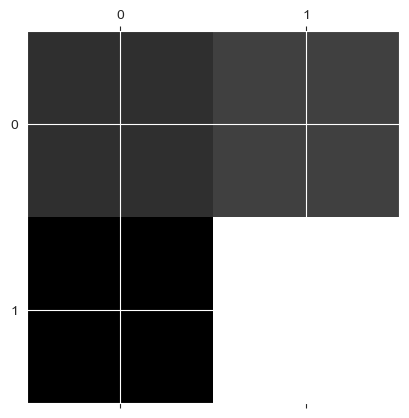

In [55]:
y_pred = cross_val_predict(linear_svc, X_scaled, y, cv=5)
conf_mx = confusion_matrix(y, y_pred)

plt.matshow(conf_mx, cmap=mpl.cm.gray)
plt.show()

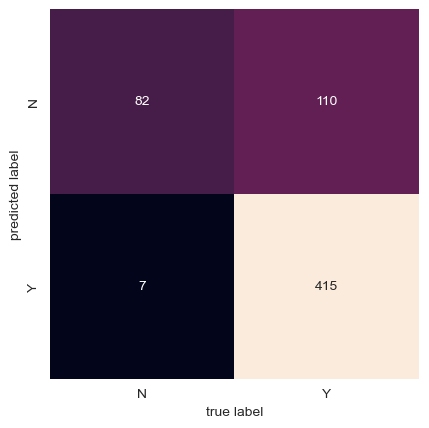

In [56]:
sns.heatmap(conf_mx, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=y.unique()[::-1],
            yticklabels=y.unique()[::-1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [57]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           N       0.92      0.43      0.58       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [59]:
lr = LogisticRegression(
    C=0.1, max_iter=1000, penalty='l1', solver='liblinear', tol=0.0001, class_weight=None
)

# Assuming 'y_true' contains true labels and 'y_pred_proba' contains predicted probabilities
lr.fit(X_train_scaled, y_train_encoded)
# y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Choose a threshold value (e.g., 0.5 by default)
threshold = 0.5

# Adjust the threshold (change it as needed)
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Compute precision and recall for the adjusted threshold
precision = precision_score(y_test_encoded, y_pred_adjusted)
recall = recall_score(y_test_encoded, y_pred_adjusted)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.7673
Recall: 0.9839


In [60]:
print(classification_report(y_test_encoded, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185


In [62]:
linear_svc.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185


In [63]:
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.87      0.33      0.48        61
           Y       0.75      0.98      0.85       124

    accuracy                           0.76       185
   macro avg       0.81      0.65      0.66       185
weighted avg       0.79      0.76      0.72       185


In [64]:
# Define class weights
class_weights = {0: 1, 1: 1}  # Assuming the positive class (1) is the minority class


lr = LogisticRegression(
    C=0.1, max_iter=1000, penalty='l1', solver='liblinear', tol=0.0001, class_weight=class_weights
)

# Assuming 'y_true' contains true labels and 'y_pred_proba' contains predicted probabilities
lr.fit(X_train_scaled, y_train_encoded)
# y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Choose a threshold value (e.g., 0.5 by default)
threshold = 0.4

# Adjust the threshold (change it as needed)
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Compute precision and recall for the adjusted threshold
precision = precision_score(y_test_encoded, y_pred_adjusted)
recall = recall_score(y_test_encoded, y_pred_adjusted)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.7673
Recall: 0.9839


In [65]:
print(classification_report(y_test_encoded, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185


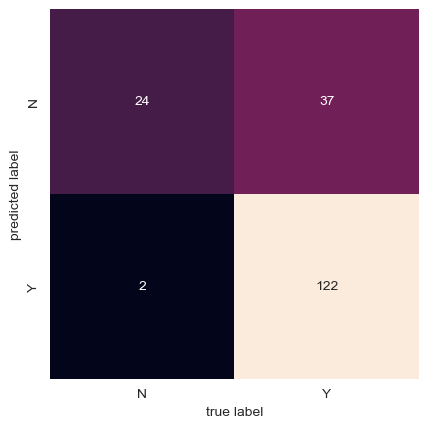

In [66]:
conf_mx = confusion_matrix(y_test_encoded, y_pred_adjusted)
sns.heatmap(conf_mx, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=y.unique()[::-1],
            yticklabels=y.unique()[::-1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [67]:
y.unique()[::-1]

array(['N', 'Y'], dtype=object)

In [68]:
conf_mx

array([[ 24,  37],
       [  2, 122]])

In [69]:
y_train_encoded[:4],label_encoder.inverse_transform(y_train_encoded)[:4]

(array([1, 1, 0, 0]), array(['Y', 'Y', 'N', 'N'], dtype=object))

In [70]:

# Create a LinearSVC modelclass_weights = {'N': 1, 'Y': 1}
svm_model = LinearSVC(dual='auto', max_iter=4000, class_weight=None)
svm_model.fit(X_train_scaled, y_train)

# Calibrate the model to obtain probability estimates
calibrated_svc = CalibratedClassifierCV(svm_model, method='sigmoid', cv='prefit')

# Fit the calibrated model
calibrated_svc.fit(X_train_scaled, y_train)  # Replace X_train and y_train with your training data

# Get calibrated probabilities
calibrated_probs = calibrated_svc.predict_proba(X_test_scaled)[:, 1]  # Assuming binary classification

# Adjusting threshold (example: threshold=0.4)
adjusted_predictions = (calibrated_probs >= 0.4).astype(int)

# Compute precision and recall for the adjusted threshold
precision = precision_score(y_test_encoded, adjusted_predictions)
recall = recall_score(y_test_encoded, adjusted_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(classification_report(y_test_encoded, adjusted_predictions))

Precision: 0.7673
Recall: 0.9839
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.85      0.69      0.71       185
weighted avg       0.82      0.79      0.76       185


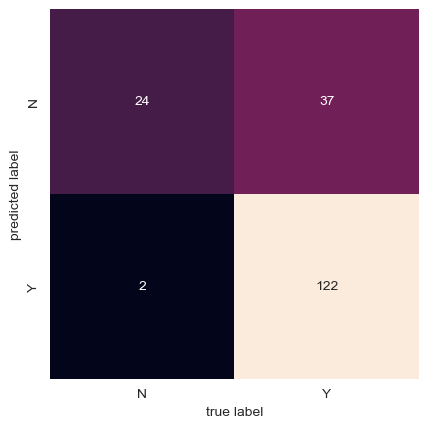

In [72]:
conf_mx = confusion_matrix(y_test_encoded, y_pred_adjusted)
sns.heatmap(conf_mx, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=y.unique()[::-1],
            yticklabels=y.unique()[::-1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [73]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(8,),
                        activation='relu',
                        # solver='adam',
                        max_iter=3000)
mlp_clf.fit(X_train_scaled, np.ravel(y_train_encoded))

y_pred_proba = mlp_clf.predict_proba(X_test_scaled)[:, 1]
y_pred_adjusted = (y_pred_proba >= 0.4).astype(int)

# Compute precision and recall for the adjusted threshold
precision = precision_score(y_test_encoded, y_pred_adjusted)
recall = recall_score(y_test_encoded, y_pred_adjusted)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(classification_report(y_test_encoded, y_pred_adjusted))


Precision: 0.7707
Recall: 0.9758
              precision    recall  f1-score   support

           0       0.89      0.41      0.56        61
           1       0.77      0.98      0.86       124

    accuracy                           0.79       185
   macro avg       0.83      0.69      0.71       185
weighted avg       0.81      0.79      0.76       185


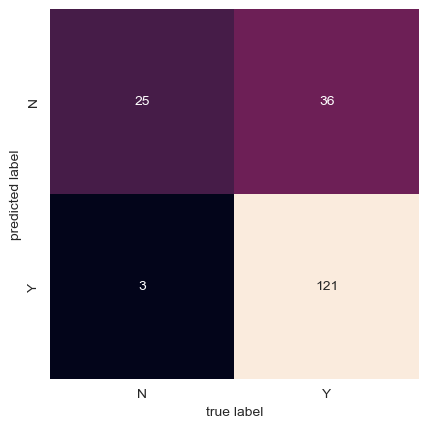

In [74]:
conf_mx = confusion_matrix(y_test_encoded, y_pred_adjusted)
sns.heatmap(conf_mx, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=y.unique()[::-1],
            yticklabels=y.unique()[::-1])
plt.xlabel('true label')
plt.ylabel('predicted label');

Let's Model Using train2:

In [75]:
X2, y2 = train2.drop(columns=['Loan_ID', 'Loan_Status']), train2.Loan_Status
X2.Credit_History = X2.Credit_History.astype('object')

In [76]:
numeric_features = X2.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X2.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [77]:
transformed_data = full_pipeline.fit_transform(X2)
feature_names = (numeric_features +
                 list(full_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

X2 = pd.DataFrame(transformed_data, columns=feature_names)
X2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583.0,1508.0,128.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,3000.0,0.0,66.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,2583.0,2358.0,120.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,6000.0,0.0,141.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,5417.0,4196.0,267.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [78]:
X2['combined_low_features'] = X2[low_imp_features].sum(axis=1)
X2 = X2.drop(low_imp_features, axis=1)
X2.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,combined_low_features
0,4583.0,1508.0,128.0,360.0,0.0,1.0,1.0,0.0,5.0
1,3000.0,0.0,66.0,360.0,0.0,1.0,0.0,0.0,6.0
2,2583.0,2358.0,120.0,360.0,0.0,1.0,0.0,0.0,6.0
3,6000.0,0.0,141.0,360.0,0.0,1.0,0.0,0.0,6.0
4,5417.0,4196.0,267.0,360.0,0.0,1.0,0.0,0.0,6.0


In [86]:
X2_scaled = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=2)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

y2_train_encoded = label_encoder.fit_transform(y2_train)
y2_test_encoded = label_encoder.transform(y2_test)

In [91]:
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

# Create a LinearSVC model
class_weights = {'N': 1, 'Y': 1}
svm_model = LinearSVC(dual='auto', max_iter=4000, class_weight=None)
svm_model.fit(X2_train_scaled, y2_train_encoded)

# Calibrate the model to obtain probability estimates
calibrated_svc = CalibratedClassifierCV(svm_model, method='sigmoid', cv='prefit')

# Fit the calibrated model
calibrated_svc.fit(X2_train_scaled, y2_train_encoded)  # Replace X_train and y_train with your training data

# Get calibrated probabilities
calibrated_probs = calibrated_svc.predict_proba(X2_test_scaled)[:, 1]  # Assuming binary classification

# Adjusting threshold (example: threshold=0.4)
adjusted_predictions = (calibrated_probs >= 0.3).astype(int)

# Compute precision and recall for the adjusted threshold
precision = precision_score(y2_test_encoded, adjusted_predictions)
recall = recall_score(y2_test_encoded, adjusted_predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(classification_report(y2_test_encoded, adjusted_predictions))

Precision: 0.7375
Recall: 1.0000
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        37
           1       0.74      1.00      0.85        59

    accuracy                           0.78        96
   macro avg       0.87      0.72      0.73        96
weighted avg       0.84      0.78      0.75        96


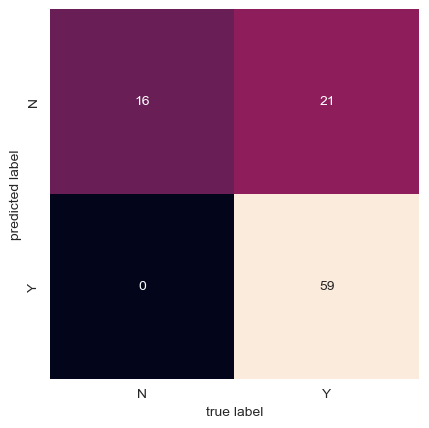

In [94]:
conf_mx = confusion_matrix(y2_test_encoded, adjusted_predictions)
sns.heatmap(conf_mx, square=True, annot=True, fmt='d',
            cbar=False, xticklabels=y.unique()[::-1],
            yticklabels=y.unique()[::-1])
plt.xlabel('true label')
plt.ylabel('predicted label');

The train model with logistic regression provides the best accuracy. We'll use it for testing.

### Model Testing

In [102]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

train.Credit_History = train.Credit_History.astype('object')
test.Credit_History = test.Credit_History.astype('object')

X_train, y_train, X_test = train.drop(columns=['Loan_ID', 'Loan_Status']), train.Loan_Status, test.drop(columns=['Loan_ID'])

In [103]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Pipeline for numeric features (Imputation)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Pipeline for categorical features (One-Hot Encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Full pipeline combining preprocessing and modeling
full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

transformed_data = full_pipeline.fit_transform(X_train)
feature_names = (numeric_features +
                 list(full_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

X_train = pd.DataFrame(transformed_data, columns=feature_names)
X_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,146.412162,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4583.0,1508.0,128.000000,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3000.0,0.0,66.000000,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.000000,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.000000,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [104]:
numeric_features = X_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_test.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

full_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

transformed_data = full_pipeline.fit_transform(X_test)
feature_names = (numeric_features +
                 list(full_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_features)))

X_test = pd.DataFrame(transformed_data, columns=feature_names)
X_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720.0,0.0,110.0,360.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3076.0,1500.0,126.0,360.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,5000.0,1800.0,208.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2340.0,2546.0,100.0,360.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,3276.0,0.0,78.0,360.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [105]:
X_train['combined_low_features'] = X_train[low_imp_features].sum(axis=1)
X_train = X_train.drop(low_imp_features, axis=1)

X_test['combined_low_features'] = X_test[low_imp_features].sum(axis=1)
X_test = X_test.drop(low_imp_features, axis=1)

In [106]:
scaler = StandardScaler()
label_encoder = LabelEncoder()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = label_encoder.fit_transform(y_train)

Model:

In [109]:
lr = LogisticRegression(
    C=0.1, max_iter=1000, penalty='l1', solver='liblinear', tol=0.0001
)

lr.fit(X_train_scaled, y_train)
y_pred = pd.DataFrame(
    {'Loan_ID':test.Loan_ID, 'Loan_Status':lr.predict(X_test_scaled)}
)
y_pred.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [110]:
file_path = 'lr_submission.csv'
y_pred.to_csv(file_path, index=False)